In [1]:
from mpl_toolkits import mplot3d

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import numpy as np

In [3]:
def eggHolder(x,y):
    return (-(y+47)*np.sin(np.sqrt(np.abs((x/2)+(y+47))))- (x*np.sin(np.sqrt(np.abs(x-y-47)))))

In [4]:
x = np.linspace(-512, 512, 1024)
y = np.linspace(-512, 512, 1024)

X, Y = np.meshgrid(x, y)
Z = eggHolder(X, Y)    

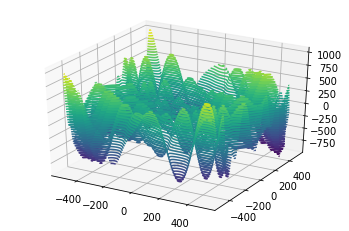

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z,40)

In [34]:
def holderTable(x,y):
    sxcy = np.sin(x)*np.cos(y)
    expArity = (np.sqrt(x**2 + y**2))/np.pi
    expArity = np.exp(np.abs(1-expArity))
    return -(np.abs(sxcy*expArity))

In [35]:
x = np.linspace(-10, 10, 2000)
y = np.linspace(-10, 10, 2000)

X, Y = np.meshgrid(x, y)
Z = holderTable(X, Y)    

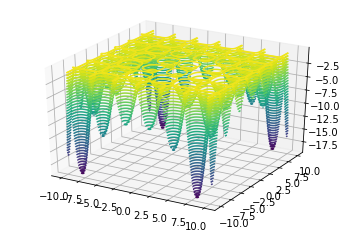

In [36]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 40)

In [9]:
eggHolder(512,401)

-948.0524632195277

In [165]:
class Particle:
  def __init__(self, x, y):
    self.x = x
    self.y = y
    self.fitness = eggHolder(x,y)
    self.velocity=np.array([0,0])
    self.pibest=np.array([x,y])

In [262]:
particles=[]
population=20

In [263]:
particles=[]
population=20
for particleNumber in range(population):
    particles.append(Particle(random.uniform(-512,512),random.uniform(-512,512)))

In [14]:
fitneessValues=[]
for particle in particles:
    fitneessValues.append(particle.fitness)

In [15]:
fbest, pbest = min(fitneessValues),np.array([particles[fitneessValues.index(min(fitneessValues))].x,particles[fitneessValues.index(min(fitneessValues))].y])

In [16]:
gbest=pbest

In [109]:
def getVelocity(particle):
    middleTerm = 3*random.random()*(particle.pibest - np.array([particle.x,particle.y]))
    endTerm = 1*random.random()*(gbest-np.array([particle.x,particle.y]))
    calculatedVelocity=particle.velocity+middleTerm+endTerm
    if abs(calculatedVelocity[0]) > 80 or abs(calculatedVelocity[1] > 80):
        mag = np.sqrt(particle.velocity[0]**2+particle.velocity[1]**2)
        particle.velocity = np.array([80*(particle.velocity[0]/mag),80*(particle.velocity[1]/mag)])
    else:
        particle.velocity=calculatedVelocity
    return particle.velocity

In [218]:
def getNewPosition(particle):
    x,y = getVelocity(particle)
    if((-512 <= (x+particle.x) <= 512) and (-512 <= (y+particle.y) <= 512)):
        particle.x+=x
        particle.y+=y
        
    else:
        if((-512 <= (x+particle.x) <= 512) and (-512 <= (y+particle.y) <= 512)):
            particle.x+=x
            particle.y+=y
        else:
            tempX = particle.x+x
            tempY = particle.y+y
            if(tempX < -512):
                particle.x=-512
            else:
                particle.x = 512
            if(tempY < -512):
                particle.y=-512
            else:
                particle.y = 512
#             particle.velocity=np.array([0,0])       
    return x,y

In [19]:
# particleMap=map(getNewPosition,particles)

In [20]:
for particle in particles:
    getNewPosition(particle)
    

In [21]:
for particle in particles:
    particle.fitness= eggHolder(particle.x,particle.y)

In [22]:
fbest1=fbest

pbest1=pbest

In [99]:
fitneessValues=[]
for particle in particles:
    fitneessValues.append(particle.fitness)
fbest, pbest = min(fitneessValues),np.array([particles[fitneessValues.index(min(fitneessValues))].x,particles[fitneessValues.index(min(fitneessValues))].y])

In [100]:
print(fbest,pbest)
print(fbest1,pbest1)

-946.4675797901217 [508.67204526 400.94116692]
-742.4589238185453 [414.88714752 443.82686849]


In [101]:
for i in range(100):
    for particle in particles:
        getNewPosition(particle)
    for particle in particles:
        particle.fitness= eggHolder(particle.x,particle.y) 
    fbest1=fbest
    pbest1=pbest
    fitneessValues=[]
    for particle in particles:
        fitneessValues.append(particle.fitness)
    fbest, pbest = min(fitneessValues),np.array([particles[fitneessValues.index(min(fitneessValues))].x,particles[fitneessValues.index(min(fitneessValues))].y])
    if fbest<fbest1:
        gbest=pbest        

In [264]:
for particle in particles:
    print(particle.x,particle.y)
    print("fitness:", particle.fitness)
fitneessValues=[]
for particle in particles:
    fitneessValues.append(particle.fitness)
fbest, pbest = min(fitneessValues),np.array([particles[fitneessValues.index(min(fitneessValues))].x,particles[fitneessValues.index(min(fitneessValues))].y])

423.4993588666198 227.93321336773215
fitness: 175.29882223284412
-23.52684715417945 509.9489363577278
fitness: 524.1076811026013
-182.5984540047358 -352.6337196685024
fitness: 86.88353341277616
387.6190752723056 -149.8262071751435
fitness: 48.113198392103186
8.670003784480627 28.941804045687263
fitness: -42.20754544566276
188.09526537325075 260.8283385231532
fitness: -98.77652201226712
-158.17752536888156 -457.8950505250025
fitness: -88.87706958434947
193.18888064947748 -288.37237017810673
fitness: -298.7942711798212
489.70703526616796 101.45023835649658
fitness: 56.532560945884555
-459.22125279542695 480.40741195650344
fitness: 524.8550816852039
-480.33318698171126 102.79516384435419
fitness: -2.3807235925055146
-416.100617104623 243.70358255684766
fitness: 318.0862505072711
482.45357195119436 351.89689187597116
fitness: -201.78007169815655
-420.1067098042995 -191.73149118370395
fitness: -327.51816078017157
-288.0601339440768 167.77640649902344
fitness: -303.1346221576204
154.91638356

In [265]:
fbest

-327.51816078017157

In [266]:
pbest

array([-420.1067098 , -191.73149118])

In [267]:
gbest = pbest

In [268]:
Averages=[]

In [269]:
for i in range(100):
    fitnessVals=[]
    for particle in particles:
        getNewPosition(particle)
        particle.fitness = eggHolder(particle.x,particle.y)
        if eggHolder(particle.x,particle.y) < eggHolder(particle.pibest[0],particle.pibest[-1]):
            particle.pibest = np.array([particle.x,particle.y])
            if (eggHolder(gbest[0],gbest[-1]) >  eggHolder(particle.x,particle.y)):
                gbest = np.array([particle.x,particle.y])
        print(particle.x,particle.y)
        fitnessVals.append(particle.fitness)
    Averages.append(sum(fitnessVals)/len(fitnessVals))
    print("__"*20)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
-451.1403429867807 341.546174171097
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
________________________________________
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
-443.05943317813444 202.68493638569055
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
________________________________________
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
-444.64884005700384 229.99708461784914
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
________________________________________
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
-449.29650782140624 309.8619654125497
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
________________________________________
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
-453

512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 -512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
________________________________________
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 -512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
________________________________________
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 -512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
________________________________________
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 -512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
________________________________________
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 -512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
________________________________________
512 51

512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 -512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
________________________________________
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 -512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
________________________________________
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 -512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
________________________________________
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 -512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
________________________________________
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 -512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
512 512
_______________________________

In [270]:
Averages

[-138.2995180919146,
 -88.96826832859878,
 -110.321724948098,
 -106.88317351422445,
 -163.10087060102867,
 -99.70029417596976,
 -152.8937563125583,
 -104.33963030826551,
 -108.0924889179274,
 -110.41718511533136,
 -137.43802465918992,
 -111.88845315035385,
 -108.10461780623855,
 -143.84543869233084,
 -90.21348161424287,
 -142.5050009787198,
 -133.96198405258662,
 -107.95673925979425,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93.73593690738737,
 -93

In [227]:
len(Averages)

100

In [259]:
x= [i for i in range(100)]

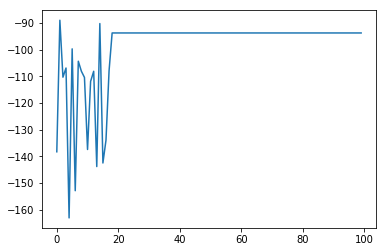

In [271]:
plt.plot(x,Averages)

In [522]:
class Particle:
  def __init__(self, x, y):
    self.x = x
    self.y = y
    self.fitness = eggHolder(x,y)
    self.velocity=np.array([random.uniform(-1,1),random.uniform(-1,1)])
    self.personalBest=np.array([x,y])
    self.bestFitness = eggHolder(x,y)

In [585]:
particles=[]
population=20
for particleNumber in range(population):
    p=Particle(random.uniform(-512,512),random.uniform(-512,512))
    p.fitness = eggHolder(p.x,p.y)
    p.bestFitness = p.fitness
    particles.append(p)

In [586]:
for particle in particles:
    print("Fitness", particle.fitness)
    print("Position: ",particle.x,particle.y)

Fitness -413.93185788119325
Position:  441.4862840757098 -363.88028509872345
Fitness -340.3295363510086
Position:  402.41204370403955 -37.29759662234085
Fitness 90.93158362488576
Position:  -153.94700389306513 -22.15853230759376
Fitness -93.36172429127677
Position:  -55.813525840804004 -120.55343858822619
Fitness 63.16333395896234
Position:  458.29400561253044 -421.1641863211411
Fitness -232.685397159394
Position:  290.26659314403594 -202.35912859146015
Fitness -137.68863337165496
Position:  437.4909308171276 490.5005614218561
Fitness -514.8030405323252
Position:  385.8078384202345 498.60927033529697
Fitness -68.46461178599257
Position:  92.30784444269591 377.74361566250616
Fitness 183.91410729625494
Position:  -330.60761735046594 60.62626781808399
Fitness 311.429083842632
Position:  408.83859582780485 -215.82155568958876
Fitness 262.8864355637092
Position:  485.5380444233125 -360.2360960259077
Fitness -156.8555905732158
Position:  -230.40028462716964 -266.3831943570808
Fitness 487.229

In [587]:
fitneessValues=[]
for particle in particles:
    fitneessValues.append(particle.fitness)
fbest, pbest = min(fitneessValues),np.array([particles[fitneessValues.index(min(fitneessValues))].x,particles[fitneessValues.index(min(fitneessValues))].y])

In [588]:
fbest,pbest

(-514.8030405323252, array([385.80783842, 498.60927034]))

In [589]:
globalBests =[]
currentGlobalBest = fbest
currGlobalBestPosition = np.array([pbest[0],pbest[-1]])

In [590]:
globalBests.append(fbest)

In [591]:
def calculateVelocity(particle):
    lastTerm = 3*random.random()*(currGlobalBestPosition-np.array([particle.x,particle.y]))
    middleTerm = random.random()*(particle.personalBest - np.array([particle.x,particle.y]))
    return particle.velocity + middleTerm + lastTerm

In [592]:
Averages=[]
for i in range(100):
    for particle in particles:
        fitVals = []
        currVelocity = calculateVelocity(particle)
        calX = particle.x + currVelocity[0]
        calY = particle.y + currVelocity[-1]
        if ((calX < 512 and calX > -512) and (calY < 512 and calY > -512)):
            particle.x = calX
            particle.y = calY
            particle.velocity = currVelocity
        else:
            velocity=[0,0]
            if(calX < -512):
                particle.x = -512
            elif (calX> 512):
                particle.x = 512
            else:
                particle.x = calX
                velocity[0]=currVelocity[0]
            if(calY < -512):
                particle.y = -512
            elif (calY > 512):
                particle.y = 512
            else:
                particle.y = calY
                velocity[-1] = currVelocity[-1]
            particle.velocity=np.array(velocity)
        particle.fitness = eggHolder(particle.x,particle.y)
        fitVals.append(particle.fitness)
        if particle.fitness < particle.bestFitness:
            particle.bestFitness = particle.fitness
            particle.personalBest = np.array([particle.x,particle.y])
        if currentGlobalBest > particle.fitness:
            currentGlobalBest = particle.fitness
            currGlobalBestPosition = np.array([particle.x,particle.y])
    Averages.append(sum(fitVals)/len(fitVals))
    print("Current Global Best",currentGlobalBest)
    print(currGlobalBestPosition)

Current Global Best -838.3273609602795
[365.431618 512.      ]
Current Global Best -846.8836638700611
[349.11222679 512.        ]
Current Global Best -846.8836638700611
[349.11222679 512.        ]
Current Global Best -858.5778800956734
[356.65918993 512.        ]
Current Global Best -858.5778800956734
[356.65918993 512.        ]
Current Global Best -858.5778800956734
[356.65918993 512.        ]
Current Global Best -858.5778800956734
[356.65918993 512.        ]
Current Global Best -858.5778800956734
[356.65918993 512.        ]
Current Global Best -858.5778800956734
[356.65918993 512.        ]
Current Global Best -858.5778800956734
[356.65918993 512.        ]
Current Global Best -858.5778800956734
[356.65918993 512.        ]
Current Global Best -858.5778800956734
[356.65918993 512.        ]
Current Global Best -858.5778800956734
[356.65918993 512.        ]
Current Global Best -858.5778800956734
[356.65918993 512.        ]
Current Global Best -858.5778800956734
[356.65918993 512.        ]

In [593]:
random.uniform(-1,1)

-0.4533204137516704

In [513]:
currGlobalBestPosition

array([ 8.60321612, -8.51703571])

In [531]:
Averages

[12.483042240703554,
 -543.4204125098063,
 -305.6557858690234,
 -277.02860754199196,
 -267.54390890113325,
 -307.1547046435582,
 228.56666892001303,
 -263.5661443592071,
 186.5170556524972,
 127.63309305980172,
 24.178016693634845,
 -796.149574118795,
 -78.77159319335271,
 360.87394664841435,
 -126.16793738465486,
 -177.29137055511475,
 407.78849169314725,
 -769.5880127832602,
 309.95457938109644,
 -143.62837783042977,
 353.11495913761837,
 415.80489669610125,
 -187.45523555476032,
 -689.6894206501723,
 235.91491285943243,
 261.60782423823605,
 308.5915893232328,
 110.8919773037826,
 417.85122137935605,
 -41.17511752663904,
 -698.8809614896185,
 -207.54315712919407,
 -126.16793738465486,
 239.30663500113516,
 436.0486176826676,
 -126.16793738465486,
 -416.2213044003338,
 515.1156219221518,
 -126.16793738465486,
 -64.32941953550284,
 178.7488198456406,
 -860.263462821956,
 225.5125529096402,
 47.6768411073831,
 401.66272470538354,
 -126.16793738465486,
 -102.06965461251411,
 -126.167937

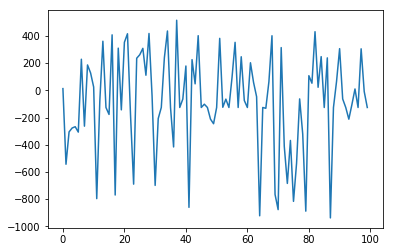

In [532]:
plt.plot(range(100),Averages)

In [561]:
class Particle:
  def __init__(self, x, y):
    self.x = x
    self.y = y
    self.fitness = holderTable(x,y)
    self.velocity=np.array([random.uniform(-1,1),random.uniform(-1,1)])
    self.personalBest=np.array([x,y])
    self.bestFitness = holderTable(x,y)

In [562]:
particles=[]
population=20
for particleNumber in range(population):
    particles.append(Particle(random.uniform(-10,10),random.uniform(-10,10)))

In [563]:
for particle in particles:
    print("Fitness", particle.fitness)
    print("Position: ",particle.x,particle.y)

Fitness -0.6546339236521622
Position:  -9.511543924710448 3.8055835247293714
Fitness -6.68772463230829
Position:  8.809070195357549 6.312903917727404
Fitness -2.929080157196294
Position:  7.049824973911232 5.450539778028652
Fitness -0.8561067682839331
Position:  6.429061964335002 -6.948891532863715
Fitness -0.4051043584913033
Position:  0.14262861623678802 -6.516483055009569
Fitness -0.24115904955608714
Position:  0.8857425330957334 1.7887851421952217
Fitness -0.3971798063933076
Position:  -3.3865499279153095 -3.314422489328585
Fitness -0.7826877865317803
Position:  -0.9713209754005128 2.553852907462513
Fitness -6.527457443491656
Position:  7.549478262938276 -5.820274969844721
Fitness -0.547174836362913
Position:  0.6110941187457737 -3.873200637844305
Fitness -1.1139419891966897
Position:  -4.926590635195545 5.046848975052537
Fitness -0.3863564752548374
Position:  5.7963240023887135 -1.223247000583651
Fitness -0.06814908263463033
Position:  -2.863134367255837 1.8024356591065764
Fitness

In [564]:
fitneessValues=[]
for particle in particles:
    fitneessValues.append(particle.fitness)
fbest, pbest = min(fitneessValues),np.array([particles[fitneessValues.index(min(fitneessValues))].x,particles[fitneessValues.index(min(fitneessValues))].y])

In [565]:
fbest,pbest

(-7.162065902169855, array([ 8.14222517, -7.15335328]))

In [566]:
globalBests =[]
currentGlobalBest = fbest
currGlobalBestPosition = np.array([pbest[0],pbest[-1]])

In [567]:
globalBests.append(fbest)

In [568]:
currentGlobalBest, currGlobalBestPosition

(-7.162065902169855, array([ 8.14222517, -7.15335328]))

In [570]:
Averages=[]
for i in range(10):
    for particle in particles:
        fitVals = []
        currVelocity = calculateVelocity(particle)
        calX = particle.x + currVelocity[0]
        calY = particle.y + currVelocity[-1]
        if ((calX < 10 and calX > -10) and (calY < 10 and calY > -10)):
            particle.x = calX
            particle.y = calY
            particle.velocity = currVelocity
        else:
            velocity=[0,0]
            if(calX < -10):
                particle.x = -10
            elif (calX> 10):
                particle.x = 10
            else:
                particle.x = calX
                velocity[0]=currVelocity[0]
            if(calY < -10):
                particle.y = -10
            elif (calY > 10):
                particle.y = 10
            else:
                particle.y = calY
                velocity[-1] = currVelocity[-1]
            particle.velocity=np.array(velocity)
        particle.fitness = holderTable(particle.x,particle.y)
        fitVals.append(particle.fitness)
        print(particle.x, particle.y)
        if particle.fitness < particle.bestFitness:
            particle.bestFitness = particle.fitness
            particle.personalBest = np.array([particle.x,particle.y])
        if currentGlobalBest > particle.fitness:
            currentGlobalBest = particle.fitness
            currGlobalBestPosition = np.array([particle.x,particle.y])
            
    Averages.append(sum(fitVals)/len(fitVals))
    print("Current Global Best",currentGlobalBest)
    print(currGlobalBestPosition)

5.588341962799705 -9.430020706065768
9.272816830820771 -9.503502491281829
5.476497654261545 -9.61583380513734
10 -8.72683862601051
8.626092120055114 -8.839921486341689
6.77669220124473 -9.851202015201123
6.01040199068359 -9.827066189005134
6.485337924222369 -9.676294024943006
9.44353716518404 -9.4617301031615
10 -10
10 -9.653766306014656
7.726687714192578 -9.58237044852369
7.801228854451741 -9.168763568756217
5.700514033897605 -9.696595323940196
10 -9.290005686846701
9.951109409904243 -10
5.596118314835145 -9.768713907801809
8.161555143030972 -9.670759792441562
5.164817651171932 -9.869692256957123
6.551244264640567 -9.692189400388783
Current Global Best -19.204284850320416
[ 8.04016641 -9.65050081]
10 -9.987300290480698
7.715272089654395 -9.636381162252613
10 -9.660504967041376
2.47726309910869 -10
6.54829866878079 -9.477170682749174
10 -9.333995155642437
4.026105778788713 -9.843663005295165
9.13829225555779 -9.740235681819879
9.960507591840216 -9.505951956368436
8.640138111423601 -9.7

In [579]:
def func1(x):
    return x
def func2():
    return 2

def func3(func):
    return func(5)

In [580]:
func3(func1)

5